<a href="https://colab.research.google.com/github/fabinho02/VA_exerc-cios-/blob/main/etapa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Crimes em Comunidades dos EUA - ETAPA 1: Análise Exploratória**

**DISCENTE:** João Vitor Da Silva Sacramento  
**DISCENTE:** Fábio Reis Da Cruz

### **Introdução**

#### **Contexto do Problema**
Este notebook representa a primeira etapa da análise do conjunto de dados *Communities & Crime*. O dataset reúne informações socioeconômicas, demográficas e de policiamento de diversas comunidades nos Estados Unidos. A complexidade dos fatores que influenciam as taxas de criminalidade torna este um problema desafiador e de grande relevância social.

#### **Objetivo**
O objetivo principal desta **Etapa 1** é realizar uma **análise exploratória unidimensional**. Isso significa que vamos investigar cada variável do conjunto de dados de forma isolada para:
* Compreender as características básicas e a distribuição de cada variável.
* Identificar a presença de valores ausentes (`missing values`).
* Detectar a existência de *outliers*.
* Formular hipóteses iniciais e preparar o terreno para as etapas subsequentes de modelagem preditiva, cujo objetivo final é prever a variável `violentPerPop` (taxa de crimes violentos).



### **2. Configuração do Ambiente**

#### **2.1. Importação das Bibliotecas**
Nesta seção, importamos as bibliotecas Python que serão utilizadas ao longo da análise.

In [ ]:
# Biblioteca para manipulação e análise de dados tabulares
import pandas as pd

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

print('Bibliotecas importadas e configurações aplicadas com sucesso!')

Bibliotecas importadas e configurações aplicadas com sucesso!


#### **2.2. Carregamento dos Dados**
Vamos carregar o conjunto de dados de treinamento (`train.csv`), que será a base para toda a nossa análise nesta etapa.

In [ ]:
import pandas as pd
import os

# URL do arquivo raw no GitHub
url = "https://raw.githubusercontent.com/glaucogoncalves/p-e/main/exames/exame-b-crimes/train.csv"

try:
    # Carrega o arquivo CSV diretamente da URL para um DataFrame do pandas
    df = pd.read_csv(url)

    print('Conjunto de dados de treino carregado com sucesso da web!')
    # Exibe as 5 primeiras linhas para uma inspeção inicial
    display(df.head())

except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Conjunto de dados de treino carregado com sucesso da web!


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,nonViolPerPop,violentPerPop
0,BowlingGreencity,KY,NaN,NaN,1,40641,2.54,12.18,86.39,1.12,...,582.0,1269.58,1786.0,3895.99,148.0,322.85,9.0,19.63,5508.05,798.39
1,Dunedincity,FL,NaN,NaN,6,34012,2.14,1.07,98.12,0.43,...,382.0,1102.23,934.0,2694.98,62.0,178.90,5.0,14.43,3990.54,513.60
2,Scherervilletown,IN,NaN,NaN,9,19926,2.69,0.72,97.01,1.27,...,85.0,344.09,497.0,2011.90,88.0,356.23,3.0,12.14,2724.37,24.29
3,Sacocity,ME,31.0,64675.0,10,15181,2.54,0.29,98.87,0.63,...,94.0,610.47,498.0,3234.19,20.0,129.89,2.0,12.99,3987.53,64.94
4,Martinsburgcity,WV,NaN,NaN,7,14073,2.33,8.56,90.13,0.58,...,202.0,1349.37,927.0,6192.38,65.0,434.20,15.0,100.20,8076.15,387.44


### **Análise Exploratória Unidimensional**

#### **Inspeção da Estrutura dos Dados**
Primeiro, vamos verificar as dimensões (número de linhas e colunas) e os tipos de dados de cada coluna para ter uma visão geral do que temos em mãos.

In [ ]:
# Exibe o número de linhas e colunas
print(f'O conjunto de dados possui {df.shape[0]} linhas (comunidades) e {df.shape[1]} colunas (variáveis).')

print('\n-----------------------\n')

# Exibe um resumo técnico do DataFrame (tipos de dados e valores não-nulos)
print('Resumo técnico do DataFrame:')
df.info()

O conjunto de dados possui 1395 linhas (comunidades) e 147 colunas (variáveis).

-----------------------

Resumo técnico do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Columns: 147 entries, communityname to violentPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 1.6+ MB


**Análise:**
* O conjunto de dados possui 1395 linhas (comunidades) e 147 colunas (variáveis). Isso nos informa que o conjunto de dados contém informações sobre 1395 comunidades diferentes e possui 147 características ou variáveis para cada comunidade.
*  Existem 116 colunas do tipo float64 (números com casas decimais), 29 do tipo int64 (números inteiros) e 2 colunas do tipo object. As colunas do tipo object geralmente contêm strings (texto), como nomes ou identificadores. Neste caso, as colunas 'communityname' e 'State' são do tipo object.

#### **Análise de Valores Ausentes**
A identificação de valores ausentes é um passo crucial. Vamos quantificar quantos valores faltam em cada coluna e qual a porcentagem que isso representa do total.

In [ ]:
# Calcula o total de valores ausentes por coluna
missing_values = df.isnull().sum()

# Filtra para mostrar apenas as colunas que têm valores ausentes
missing_values = missing_values[missing_values > 0]

# Cria um DataFrame para apresentar os resultados de forma clara
if not missing_values.empty:
    print('Relatório de Valores Ausentes:')
    missing_df = pd.DataFrame({
        'Quantidade': missing_values,
        'Porcentagem (%)': (missing_values / len(df)) * 100
    }).sort_values(by='Porcentagem (%)', ascending=False)
    display(missing_df)
else:
    print('Parabéns! Não foram encontrados valores ausentes no conjunto de dados.')

Relatório de Valores Ausentes:


,Quantidade,Porcentagem (%)
numPolice,1167,83.655914
pctPolicPatrol,1167,83.655914
policePerPop,1167,83.655914
policeField,1167,83.655914
policeFieldPerPop,1167,83.655914
policCallPerPop,1167,83.655914
policeCalls,1167,83.655914
policCallPerOffic,1167,83.655914
policePerPop2,1167,83.655914
pctPolicHisp,1167,83.655914


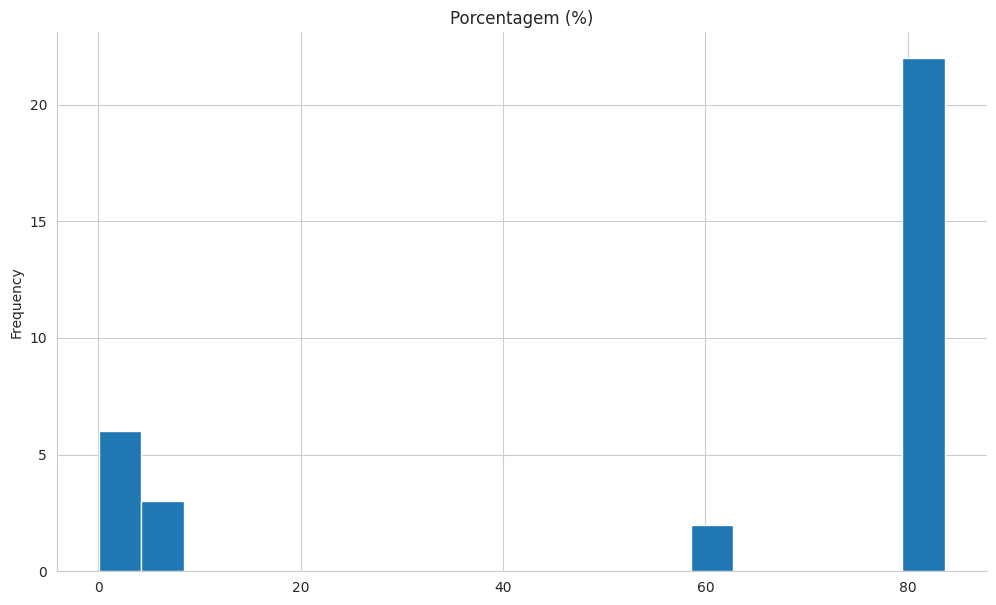

In [ ]:
# @title Porcentagem (%)

from matplotlib import pyplot as plt
missing_df['Porcentagem (%)'].plot(kind='hist', bins=20, title='Porcentagem (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

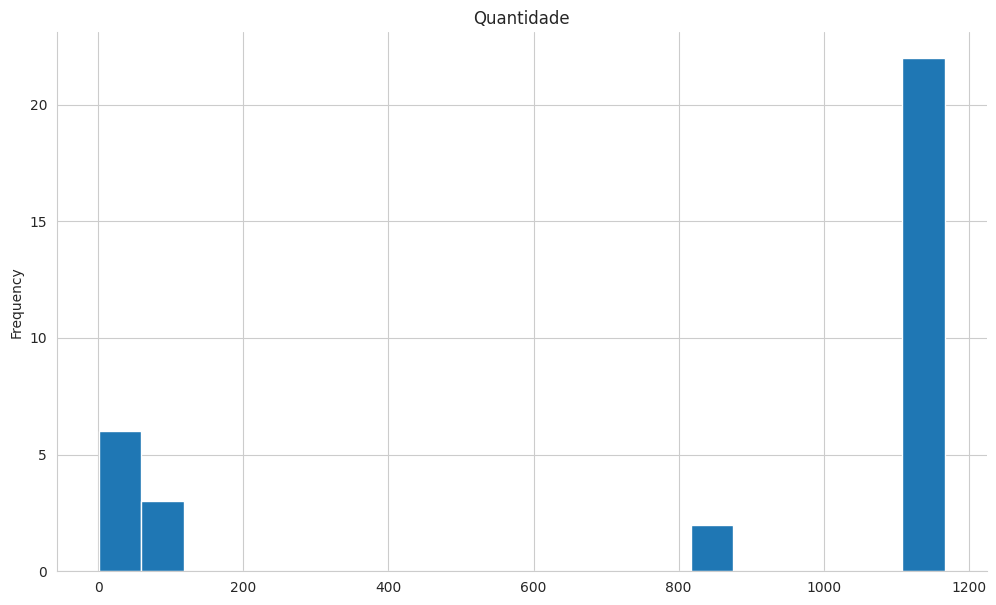

In [ ]:
# @title Quantidade

from matplotlib import pyplot as plt
missing_df['Quantidade'].plot(kind='hist', bins=20, title='Quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Análise:**
* Colunas com alta porcentagem de ausência (ex: > 80%): Você pode ver que um grande bloco de colunas relacionadas a dados policiais (numPolice, pctPolicPatrol, policePerPop, etc.) tem mais de 83% dos seus valores ausentes. Isso sugere que a coleta de dados policiais pode ter sido inconsistente ou incompleta para muitas comunidades neste dataset. Variáveis com tantos dados ausentes podem ser difíceis de usar em modelos preditivos sem um tratamento rigoroso (como imputação cuidadosa ou até mesmo a remoção da coluna, dependendo da estratégia).

* Colunas com porcentagem moderada de ausência (aprox. 59%): communityCode e countyCode também possuem uma quantidade significativa de valores ausentes (cerca de 59%). Esses são identificadores e podem não ser cruciais para a modelagem preditiva em si, mas a alta ausência ainda é notável.

* Colunas com baixa porcentagem de ausência (< 5%): Outras variáveis como nonViolPerPop, arsonsPerPop, arsons, autoTheftPerPop, autoTheft, burglaries, larcPerPop, burglPerPop, e larcenies têm uma porcentagem de valores ausentes muito menor (abaixo de 5%). Para essas colunas, estratégias de imputação (preencher os valores ausentes com a média, mediana ou moda) são geralmente viáveis e menos propensas a distorcer os dados.   

#### **Análise da Variável Alvo (`violentPerPop`)**
A variável `violentPerPop` é o nosso alvo de previsão. Entender sua distribuição, tendência central e dispersão é o ponto mais importante desta análise.

In [ ]:
# Gera estatísticas descritivas para a variável alvo
print('Estatísticas Descritivas para "violentPerPop":')
display(df['violentPerPop'].describe())

# Calcula a assimetria
print(f"\nAssimetria (Skewness): {df['violentPerPop'].skew():.2f}")

Estatísticas Descritivas para "violentPerPop":


,violentPerPop
count,1395.000000
mean,610.222258
std,635.140801
min,0.000000
25%,170.920000
50%,383.570000
75%,816.315000
max,4877.060000



Assimetria (Skewness): 2.02


###**Análise:**
**Estatísticas Descritivas:**

* count: 1395.000000 (Confirma que temos 1395 comunidades com dados para esta variável).
* mean: 610.222258 (A taxa média de crimes violentos por 100k habitantes é aproximadamente 610.22).
* std: 635.140801 (O desvio padrão é de aproximadamente 635.14. Um valor alto em relação à média sugere que os dados estão bastante dispersos).
* min: 0.000000 (A menor taxa de crimes violentos registrada é 0).
* 25%: 170.920000 (25% das comunidades têm uma taxa de crimes violentos menor ou igual a 170.92).
* 50%: 383.570000 (A mediana é 383.57. 50% das comunidades têm uma taxa menor ou igual a este valor. Note que a mediana (383.57) é significativamente menor que a média (610.22), o que já indica uma assimetria à direita).
* 75%: 816.315000 (75% das comunidades têm uma taxa de crimes violentos menor ou igual a 816.315).
* max: 4877.060000 (A taxa máxima de crimes violentos registrada é extremamente alta: 4877.06. Este valor máximo é muito maior que o 75º percentil, o que reforça a ideia de outliers e assimetria).

**Assimetria (Skewness): 2.02**
* Um valor de assimetria positivo e maior que 1 indica uma forte assimetria positiva (ou à direita). Isso significa que a cauda da distribuição se estende mais para a direita, com uma concentração maior de dados nos valores mais baixos e alguns valores (os outliers) muito altos "puxando" a média.

Esses resultados confirmam que a variável violentPerPop não tem uma distribuição normal e é fortemente influenciada por comunidades com taxas de crimes violentos excepcionalmente altas. Isso é uma informação crucial para as próximas etapas de pré-processamento e modelagem.

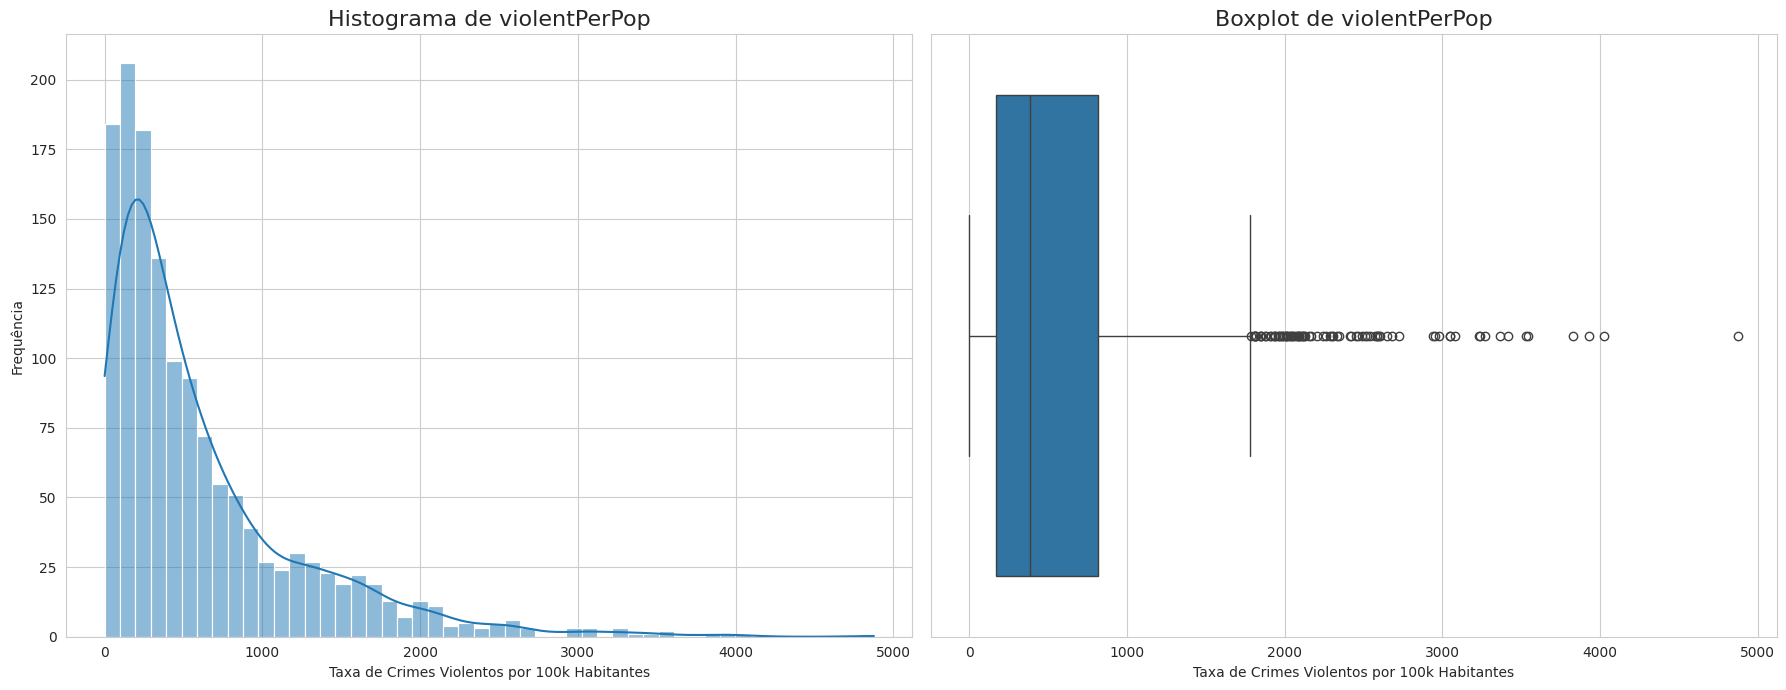

In [ ]:
# Cria uma figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Histograma
sns.histplot(df['violentPerPop'], kde=True, ax=axes[0], bins=50)
axes[0].set_title('Histograma de violentPerPop', fontsize=16)
axes[0].set_xlabel('Taxa de Crimes Violentos por 100k Habitantes')
axes[0].set_ylabel('Frequência')

# Boxplot
sns.boxplot(x=df['violentPerPop'], ax=axes[1])
axes[1].set_title('Boxplot de violentPerPop', fontsize=16)
axes[1].set_xlabel('Taxa de Crimes Violentos por 100k Habitantes')

plt.tight_layout()
plt.show()

**Análise dos Gráficos:**
* O **histograma** mostra visualmente a concentração de dados nos valores mais baixos e a longa cauda para a direita, confirmando a forte assimetria que vimos nas estatísticas descritivas.
* O **boxplot** ilustra claramente a distribuição da maioria dos dados dentro da caixa e os pontos individuais à direita que se estendem muito além do "bigode" superior, representando os outliers com taxas de crimes violentos muito altas.

A análise desses gráficos reforça a necessidade de considerar o tratamento da assimetria e dos outliers na etapa de pré-processamento, antes de construir modelos preditivos.

#### **Análise de Outras Variáveis Relevantes**
Vamos repetir um processo similar para outras duas variáveis que, intuitivamente, podem ter relação com a criminalidade: a porcentagem de população pobre (`povertyPercent`) e a porcentagem de domicílios com ambos os pais (`pctKids2Par`).

In [ ]:
# Exibe todas as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns.tolist())

Colunas do DataFrame:
['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'p

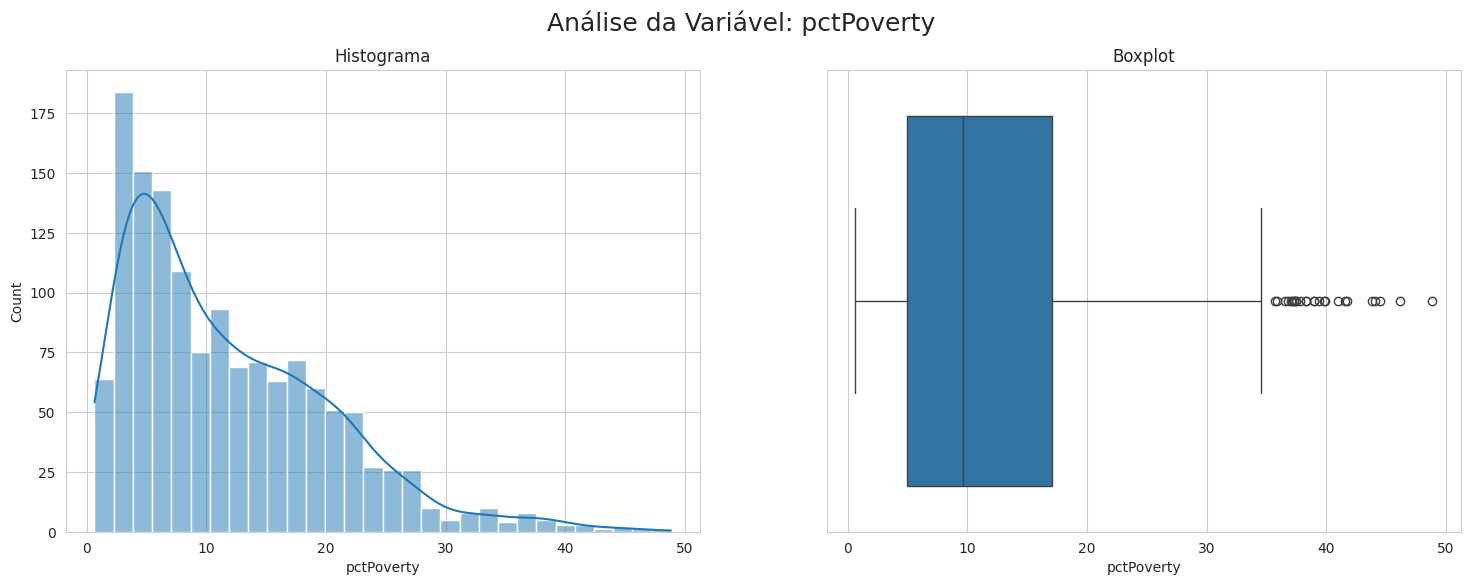

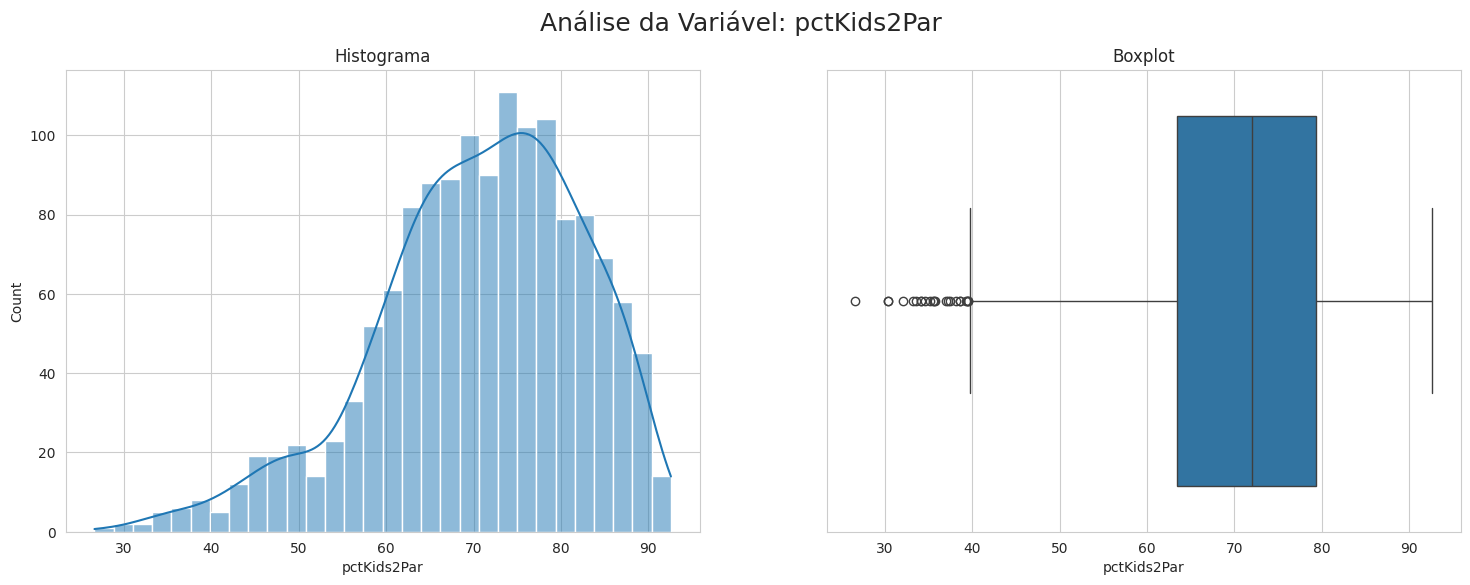

In [ ]:
# Seleciona algumas variáveis para análise
# Corrigindo os nomes das colunas com base na inspeção do DataFrame
vars_to_analyze = ['pctPoverty', 'pctKids2Par']

# Gera gráficos para cada variável
for var in vars_to_analyze:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Análise da Variável: {var}', fontsize=18)

    # Histograma
    sns.histplot(df[var], kde=True, ax=axes[0], bins=30)
    axes[0].set_title('Histograma')
    axes[0].set_xlabel(var) # Adiciona rótulo ao eixo x

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[1])
    axes[1].set_title('Boxplot')
    axes[1].set_xlabel(var) # Adiciona rótulo ao eixo x


    plt.show()
    print('\n' + '='*80 + '\n')

###**Análise:**
**Análise dos Gráficos para pctPoverty:**

* Histograma: Ao olhar para o histograma de pctPoverty, você provavelmente verá uma distribuição que tende a ter uma cauda mais longa para a direita, ou seja, uma assimetria positiva. Isso sugere que a maioria das comunidades tem uma porcentagem de pobreza relativamente baixa, mas existem algumas comunidades com porcentagens de pobreza significativamente mais altas.

* Boxplot: O boxplot para pctPoverty provavelmente mostrará que a maioria dos dados está concentrada em valores mais baixos, com alguns pontos individuais (outliers) se estendendo para cima. Esses outliers representam as comunidades com as maiores taxas de pobreza.

* O que isso significa: A pobreza não está distribuída uniformemente entre as comunidades; uma minoria de comunidades concentra os maiores índices de pobreza. Variáveis assimétricas podem ter um impacto não linear em modelos preditivos e podem se beneficiar de transformações.

**Análise dos Gráficos para pctKids2Par:**

* Histograma: Para pctKids2Par, o histograma provavelmente mostrará uma concentração de dados em valores mais altos, com uma cauda se estendendo para a esquerda. Isso indica uma assimetria negativa (ou à esquerda). A maioria das comunidades tende a ter uma alta porcentagem de domicílios com ambos os pais.

* Boxplot: O boxplot para pctKids2Par deve mostrar a caixa principal nos valores mais altos, com o "bigode" inferior e possivelmente alguns outliers nos valores mais baixos. Isso confirma que a maioria das comunidades tem alta porcentagem de crianças vivendo com ambos os pais, mas há comunidades com taxas mais baixas.

* O que isso significa: A estrutura familiar com dois pais é mais comum na maioria das comunidades deste dataset. Uma assimetria à esquerda também é importante de ser considerada no pré-processamento.



### **Conclusões da Etapa 1**

Ao final desta primeira etapa de análise unidimensional, chegamos às seguintes conclusões principais:

1.  **Qualidade dos Dados:** O conjunto de dados possui um número significativo de colunas com valores ausentes, o que exigirá uma estratégia de tratamento cuidadosa na próxima fase.
2.  **Variável Alvo:** A variável `violentPerPop` é fortemente assimétrica à direita e possui muitos outliers. Isso pode ser um problema para modelos lineares e sugere que transformações (como a logarítmica) podem ser necessárias na etapa de pré-processamento.
3.  **Outras Variáveis:** A análise de outras variáveis revelou diferentes tipos de distribuições, algumas simétricas e outras também assimétricas, com ou sem a presença de outliers.

**Próximos Passos:**
A próxima etapa do projeto consistirá na **análise bidimensional e multimensional**, onde investigaremos as **relações entre as variáveis** (correlações), especialmente a relação de cada variável com a nossa variável alvo, `violentPerPop`.